### Distribution of Propogation Times for Gossip Protocol
This is the distribution of propagation times from this simulator ranging for 10, 30, 50, 70 and 100 nodes using GKE. The specifications of this test are:-

- Locattion type: Zonal
- Total Memory: 24GB
- Total vCPUs: 12
- Total Nodes: 6
- Tier: Standard
- Location: us-central1

All data (results) generated from this gossip test distribution can be downloaded [here].

In [ ]:
import pandas as pd
import numpy as np
import json, re
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Point this to google drive where all results are stored. Change according to your data location.
# Results can be found from :
%cd /content/drive/My Drive/Colab Notebooks/bcgossip/sim/gpbc/cnsim_plosone/distribution

/content/drive/My Drive/Colab Notebooks/bcgossip/sim/gpbc/cnsim_plosone/distribution


In [ ]:
"""
    Calculate message propagation statistics from a CSV file with detailed print output.

    Parameters:
    - csv_path: Path to the CSV file containing the data
    - filter_convergence: If True, removes rows where 'message' ends with "-0"

    Returns:
    - Tuple of (propagation_times_series, statistics_series)
"""
def calculate_propagation_stats(csv_path, filter_convergence=False):

    filename = os.path.basename(csv_path)

    # Load data
    data = pd.read_csv(csv_path)

    # Optional filter for convergence phase
    if filter_convergence:
        data = data[~data['message'].str.endswith("-0")]

    # Convert timestamp to milliseconds
    data['received_timestamp'] = data['received_timestamp'] / 1e6

    # Filter for event types
    initiate_data = data[data['event_type'] == 'initiate']
    received_data = data[data['event_type'] == 'received']

    # Group by message and calculate timestamps
    max_received_timestamps = received_data.groupby('message')['received_timestamp'].max()
    initiate_timestamps = initiate_data.groupby('message')['received_timestamp'].first()

    # Calculate propagation times
    propagation_times = max_received_timestamps - initiate_timestamps

    # Print results
    print(f"\nCalculated Propagation Times: {filename}")
    print(propagation_times)

    # Compute statistics
    if not propagation_times.empty:
        stats = propagation_times.agg(['mean', 'median', 'max', 'var', 'std'])
        print("\nStatistical Summary:")
        print(stats)
    else:
        stats = pd.Series()
        print("\nNo propagation times calculated. Check your data or message extraction.")

    return propagation_times, stats

In [ ]:
"""
    Analyze and visualize the distribution of propagation times from a CSV file.

    Parameters:
    - csv_path: Path to the CSV file containing the data
    - filter_convergence: If True, removes rows where 'message' ends with "-0"
    - title: Title of the diagram

    Returns:
    - DataFrame with propagation times
    - Figure object of the plot
"""
def plot_distribution(csv_path, title, filter_convergence=True):

    filename = os.path.basename(csv_path)
    node_count = filename.split('-')[1].replace('cubaan', '')  # Extract node count from filename

    # Load data
    data = pd.read_csv(csv_path)

    # Optional filter for convergence phase
    if filter_convergence:
        data = data[~data['message'].str.endswith("-0")]

    # Prepare data
    data['received_timestamp'] = pd.to_datetime(data['received_timestamp'])

    # Calculate propagation times in milliseconds for each message
    data['propagation_time_ms'] = data.groupby('message')['received_timestamp'].transform(
        lambda x: (x.max() - x.min()).total_seconds() * 1000
    )

    # Create visualization
    print("\n # Creating visualization")
    plt.figure(figsize=(10, 6))
    plot = sns.histplot(data['propagation_time_ms'], bins=50, kde=True)
    # plt.title(title, fontsize=13)
    plt.xlabel('Propagation Time (ms)', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.8)

    # Calculate and print statistics
    stats = data['propagation_time_ms'].describe()
    print("\nPropagation Time Statistics:")
    print(stats)

    return data, plot.figure


Calculated Propagation Times: 5649-cubaan10-100X.csv
message
5649-cubaan10-1      138.014648
5649-cubaan10-10      50.831055
5649-cubaan10-100     48.504883
5649-cubaan10-11      93.788574
5649-cubaan10-12     140.833496
                        ...    
5649-cubaan10-95      54.572510
5649-cubaan10-96      56.280029
5649-cubaan10-97      57.778809
5649-cubaan10-98      56.661621
5649-cubaan10-99      54.061035
Name: received_timestamp, Length: 100, dtype: float64

Statistical Summary:
mean       64.649543
median     54.278076
max       179.183838
var       810.991580
std        28.477914
Name: received_timestamp, dtype: float64

 # Creating visualization

Propagation Time Statistics:
count    1000.000000
mean       64.649010
std        28.349322
min        44.190000
25%        50.595500
50%        54.277500
75%        62.571750
max       179.183000
Name: propagation_time_ms, dtype: float64


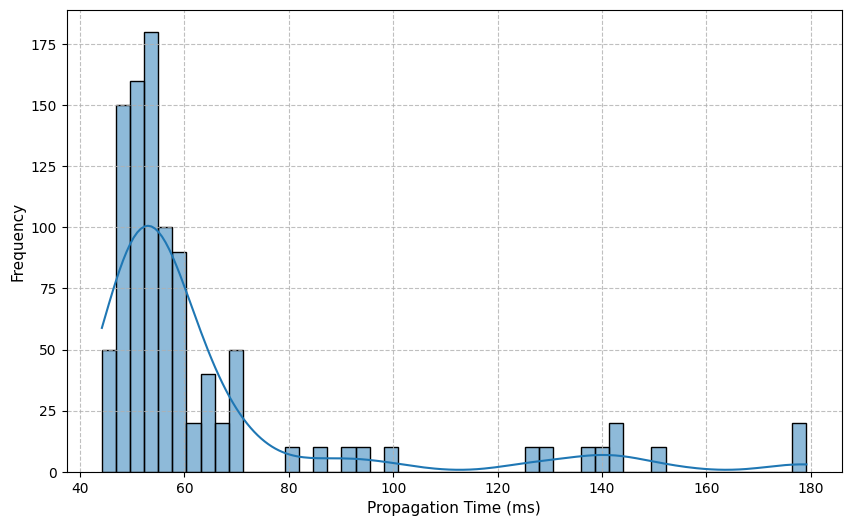

In [ ]:
## Propagation times for 10 Nodes ; zonal
prop_times, stats = calculate_propagation_stats('5649-cubaan10-100X.csv', True)
title=f'(a) Distribution of Propagation Time for 10 Nodes'
data, fig = plot_distribution('5649-cubaan10-100X.csv',title,True)


Calculated Propagation Times: 8db7-cubaan30-100X.csv
message
8db7-cubaan30-1      351.840576
8db7-cubaan30-10     321.204590
8db7-cubaan30-100    190.432373
8db7-cubaan30-11     419.243164
8db7-cubaan30-12     194.317139
                        ...    
8db7-cubaan30-95     164.320068
8db7-cubaan30-96     172.682617
8db7-cubaan30-97     171.275635
8db7-cubaan30-98     200.371826
8db7-cubaan30-99     202.077393
Name: received_timestamp, Length: 100, dtype: float64

Statistical Summary:
mean        237.859919
median      180.272339
max         884.266602
var       13111.287923
std         114.504532
Name: received_timestamp, dtype: float64

 # Creating visualization

Propagation Time Statistics:
count    3000.000000
mean      237.859450
std       113.949564
min       146.297000
25%       166.818000
50%       180.272000
75%       321.822500
max       884.266000
Name: propagation_time_ms, dtype: float64


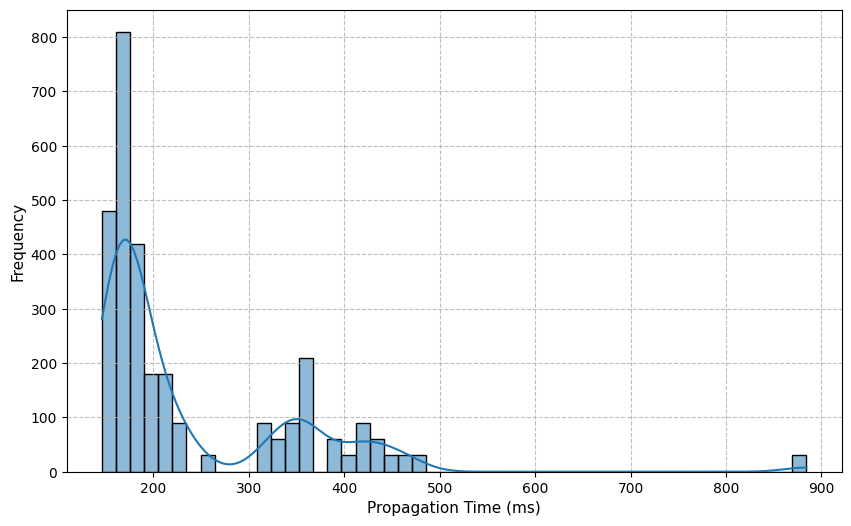

In [ ]:
## Propagation times for 30 Nodes ; zonal
prop_times, stats = calculate_propagation_stats('8db7-cubaan30-100X.csv',True)
title=f'(b) Distribution of Propagation Time for 30 Nodes'
data, fig = plot_distribution('8db7-cubaan30-100X.csv',title,True)


Calculated Propagation Times: ea4b-cubaan50-100X.csv
message
ea4b-cubaan50-1      583.291260
ea4b-cubaan50-10     769.724121
ea4b-cubaan50-100    364.430420
ea4b-cubaan50-11     728.718506
ea4b-cubaan50-12     544.633301
                        ...    
ea4b-cubaan50-95     292.510010
ea4b-cubaan50-96     256.205322
ea4b-cubaan50-97     278.267578
ea4b-cubaan50-98     349.751221
ea4b-cubaan50-99     268.449219
Name: received_timestamp, Length: 100, dtype: float64

Statistical Summary:
mean        439.164277
median      360.436523
max        1029.112793
var       28376.827642
std         168.454230
Name: received_timestamp, dtype: float64

 # Creating visualization

Propagation Time Statistics:
count    5000.000000
mean      439.163780
std       167.626619
min       252.728000
25%       286.053000
50%       360.436000
75%       576.583000
max      1029.112000
Name: propagation_time_ms, dtype: float64


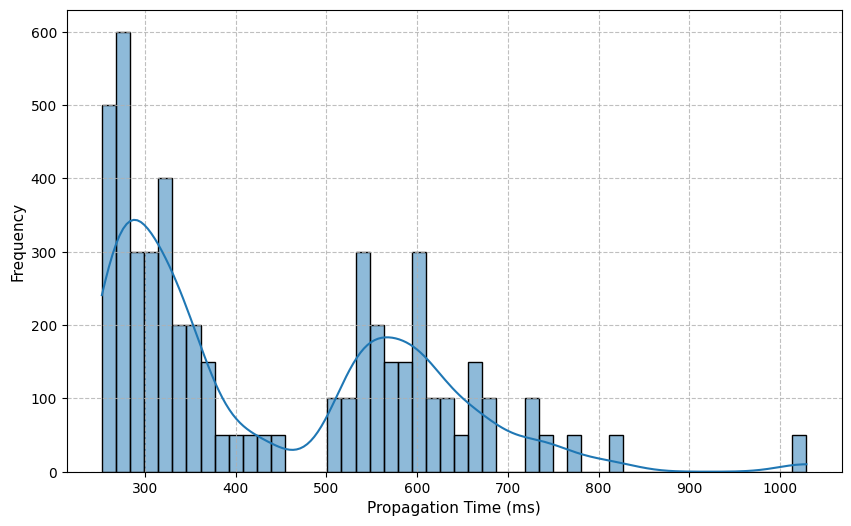

In [ ]:
## Propagation times for 50 Nodes ; zonal
prop_times, stats = calculate_propagation_stats('ea4b-cubaan50-100X.csv',True)
title=f'(c) Distribution of Propagation Time for 50 Nodes'
data, fig = plot_distribution('ea4b-cubaan50-100X.csv',title,True)


Calculated Propagation Times: 0c28-cubaan70-100X.csv
message
0c28-cubaan70-1       829.550293
0c28-cubaan70-10      906.970459
0c28-cubaan70-100     417.632812
0c28-cubaan70-11     1293.857666
0c28-cubaan70-12      908.403564
                        ...     
0c28-cubaan70-95      798.030029
0c28-cubaan70-96      382.542480
0c28-cubaan70-97      743.334961
0c28-cubaan70-98      399.678223
0c28-cubaan70-99      524.071533
Name: received_timestamp, Length: 100, dtype: float64

Statistical Summary:
mean        664.367253
median      724.480225
max        1764.505615
var       55824.800584
std         236.272725
Name: received_timestamp, dtype: float64

 # Creating visualization

Propagation Time Statistics:
count    7000.000000
mean      664.366740
std       235.105137
min       352.502000
25%       469.946750
50%       724.480000
75%       803.058250
max      1764.505000
Name: propagation_time_ms, dtype: float64


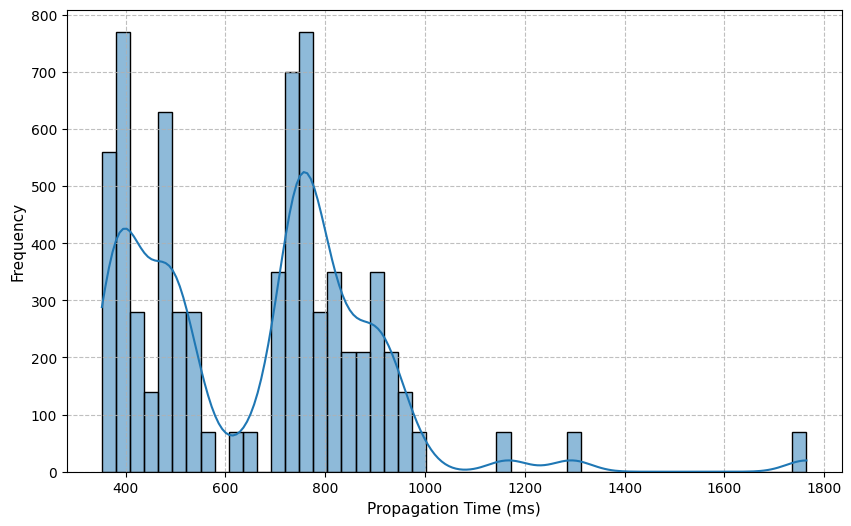

In [ ]:
## Propagation times for 70 Nodes ; zonal
prop_times, stats = calculate_propagation_stats('0c28-cubaan70-100X.csv',True)
title=f'(d) Distribution of Propagation Time for 70 Nodes'
data, fig = plot_distribution('0c28-cubaan70-100X.csv',title,True)


Calculated Propagation Times: ee93-cubaan100-100X.csv
message
ee93-cubaan100-1      1327.211426
ee93-cubaan100-10     1146.887695
ee93-cubaan100-100    1077.830078
ee93-cubaan100-11     1518.631592
ee93-cubaan100-12      610.595215
                         ...     
ee93-cubaan100-95      786.493164
ee93-cubaan100-96      641.023926
ee93-cubaan100-97      690.270264
ee93-cubaan100-98      533.713867
ee93-cubaan100-99      701.027832
Name: received_timestamp, Length: 100, dtype: float64

Statistical Summary:
mean        1011.111206
median      1105.994507
max         1813.478027
var       127419.762057
std          356.959048
Name: received_timestamp, dtype: float64

 # Creating visualization

Propagation Time Statistics:
count    10000.000000
mean      1011.110690
std        355.187469
min        509.854000
25%        630.713250
50%       1105.994000
75%       1271.435250
max       1813.477000
Name: propagation_time_ms, dtype: float64


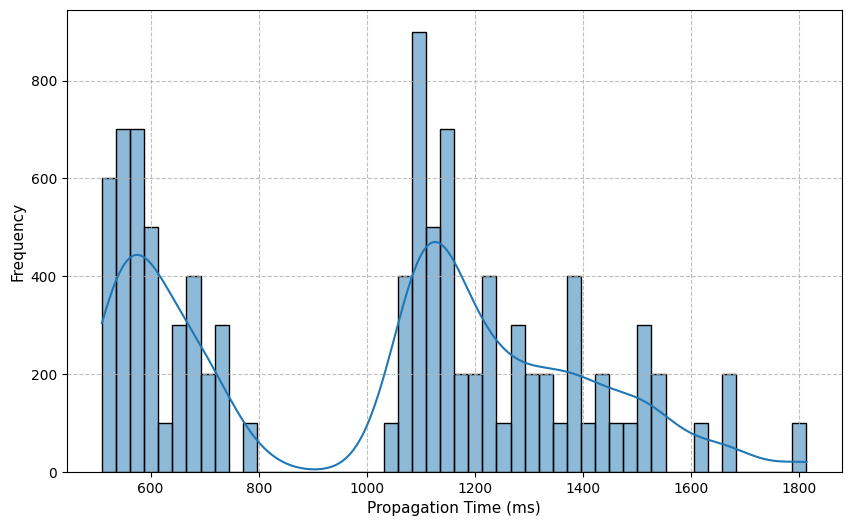

In [ ]:
## Propagation times for 100 Nodes ; zonal
prop_times, stats = calculate_propagation_stats('ee93-cubaan100-100X.csv',True)
title=f'(e) Distribution of Propagation Time for 100 Nodes'
data, fig = plot_distribution('ee93-cubaan100-100X.csv',title,True)